In [9]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.We are going to explore the top 100 movie releases of 2017 using the dataset here:

https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses

First, read in the 100 movie table using pd.read_html.

In [10]:
# insert 1
table = pd.read_html('https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses')[0]
table

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
0,1,Star Wars: Episode VIII - The Last Jedi,-,-,-,"$620,181,382",4232,"$220,009,584",35.5%,4232,Dec 15,Apr 19,Walt Disney Studios Motion Pictures,False
1,2,Beauty and the Beast,-,-,-,"$504,014,165",4210,"$174,750,616",34.7%,4210,Mar 17,Jul 13,Walt Disney Studios Motion Pictures,False
2,3,Wonder Woman,-,-,-,"$412,563,408",4165,"$103,251,471",25%,4165,Jun 2,Nov 9,Warner Bros.,False
3,4,Jumanji: Welcome to the Jungle,-,-,-,"$404,515,480",3849,"$36,169,328",8.9%,3765,Dec 20,May 31,Sony Pictures Entertainment (SPE),False
4,5,Guardians of the Galaxy Vol. 2,-,-,-,"$389,813,101",4347,"$146,510,104",37.6%,4347,May 5,Sep 21,Walt Disney Studios Motion Pictures,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Youth,-,-,-,"$1,891,956",35,"$338,604",17.9%,30,Dec 15,Jan 28,China Lion Film Distribution,False
196,197,A Quiet Passion,-,-,-,"$1,865,396",135,"$45,825",2.5%,6,Apr 14,Jul 13,Music Box Films,False
197,198,Toilet: A Love Story,-,-,-,"$1,830,715",178,"$678,436",37.1%,178,Aug 11,Sep 7,Reliance Big Pictures,False
198,199,The Wall,-,-,-,"$1,803,064",540,"$897,955",49.8%,540,May 12,Jun 22,Roadside Attractions,False


2.Only the columns for movie name, total gross, opening gross and open date contain valuable info that we will use. Save this reduced table to a dataframe called movies. (Hint: you can use iloc.) Then reset the index. Be sure the changes save!

In [11]:
# insert 2

# release, gross, opening, open
movies = table[['Release','Gross', 'Opening', 'Open']]
movies.head()

,Release,Gross,Opening,Open
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$220,009,584",Dec 15
1,Beauty and the Beast,"$504,014,165","$174,750,616",Mar 17
2,Wonder Woman,"$412,563,408","$103,251,471",Jun 2
3,Jumanji: Welcome to the Jungle,"$404,515,480","$36,169,328",Dec 20
4,Guardians of the Galaxy Vol. 2,"$389,813,101","$146,510,104",May 5


3.Rename the columns to be movie, total gross, opening gross, open date.

In [12]:
# insert 3
movies = movies.rename(columns={'Release':'movie', 'Gross':'total gross', 'Opening':'opening gross', 'Open':'open date'})
movies.head()


,movie,total gross,opening gross,open date
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$220,009,584",Dec 15
1,Beauty and the Beast,"$504,014,165","$174,750,616",Mar 17
2,Wonder Woman,"$412,563,408","$103,251,471",Jun 2
3,Jumanji: Welcome to the Jungle,"$404,515,480","$36,169,328",Dec 20
4,Guardians of the Galaxy Vol. 2,"$389,813,101","$146,510,104",May 5


4.You can strip the dollar signs and commas from the total gross using list comprehensions. Study the code carefully below and run it:

In [27]:
movies['total gross'] = [x.strip('$') for x in movies['total gross']]
movies['total gross'] = [x.replace(',', '') for x in movies['total gross']]

C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1491117822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['total gross'] = [x.strip('$') for x in movies['total gross']]
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1491117822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['total gross'] = [x.replace(',', '') for x in movies['total gross']]


5.Strip the dollar signs from the open gross column using a similar list comprehension.

In [28]:
# insert 5
movies['opening gross'] = [gross.strip('$') for gross in movies['opening gross']]
movies['opening gross'] = [x.replace(',', '') for x in movies['opening gross']]

movies = movies[movies['opening gross'] != '-']
movies

C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/997309548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['opening gross'] = [gross.strip('$') for gross in movies['opening gross']]
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/997309548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['opening gross'] = [x.replace(',', '') for x in movies['opening gross']]


,movie,total gross,opening gross,open date,open month,budget
0,Star Wars: Episode VIII - The Last Jedi,620181382,220009584,2017-12-15,12,"$317,000,000"
1,Beauty and the Beast,504014165,174750616,2017-03-17,3,"$160,000,000"
2,Wonder Woman,412563408,103251471,2017-06-02,6,"$149,000,000"
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,12,"$90,000,000"
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,5,"$200,000,000"
...,...,...,...,...,...,...
160,Phoenix Forgotten,3600146,1816499,2017-04-21,4,"$2,800,000"
161,An Inconvenient Sequel: Truth to Power,3496795,124823,2017-07-28,7,"$1,000,000"
165,Close Encounters of the Third Kind2017 Re-release,3100479,1767758,2017-09-01,9,"$20,000,000"
171,Wolf Warrior 2,2721100,219022,2017-07-28,7,"$30,100,000"


6.Change the gross columns to integer data types.

In [29]:
# insert 6
movies['total gross'] = movies['total gross'].astype(int)
movies['opening gross'] = movies['opening gross'].astype(int)
movies.dtypes

movie                    object
total gross               int32
opening gross             int32
open date        datetime64[ns]
open month                int64
budget                   object
dtype: object

7.Plot total gross on the x axis and open gross on the y-axis.

Text(0, 0.5, 'Opening Gross')

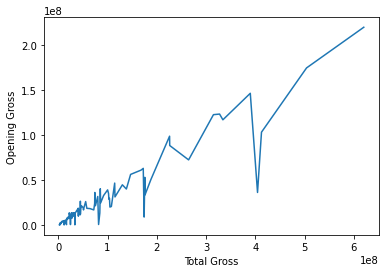

In [30]:
# insert 7
plt.plot(movies['total gross'], movies['opening gross'])
plt.xlabel('Total Gross')
plt.ylabel('Opening Gross')

8.Create another column called ratio that is given by the opening gross divided by the total gross. Do it in one line.

In [31]:
# insert 8
movies['ratio'] = movies['opening gross']/movies['total gross']
movies.head()

,movie,total gross,opening gross,open date,open month,budget,ratio
0,Star Wars: Episode VIII - The Last Jedi,620181382,220009584,2017-12-15,12,"$317,000,000",0.354750
1,Beauty and the Beast,504014165,174750616,2017-03-17,3,"$160,000,000",0.346718
2,Wonder Woman,412563408,103251471,2017-06-02,6,"$149,000,000",0.250268
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,12,"$90,000,000",0.089414
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,5,"$200,000,000",0.375847


9.Sort the ratio from smallest to largest to find the biggest "sleeper" hit (meaning, the movie that didn't make that much in its opening weekend but made a lot of money later.)

In [32]:
# insert 9
movies.sort_values(by='ratio')


,movie,total gross,opening gross,open date,open month,budget,ratio
73,Wind River,33800859,161558,2017-08-04,8,"$11,000,000",0.004780
122,"Roman J. Israel, Esq.",11962778,61999,2017-11-17,11,"$22,000,000",0.005183
38,The Post,81903458,526011,2017-12-22,12,"$50,000,000",0.006422
92,Gifted,24801212,446380,2017-04-07,4,"$7,000,000",0.017998
113,Detroit,16790139,350190,2017-07-28,7,"$34,000,000",0.020857
...,...,...,...,...,...,...,...
157,Friend Request,3759078,2002863,2017-09-22,9,"$9,900,000",0.532807
131,A Cure for Wellness,8106986,4356941,2017-02-17,2,"$40,000,000",0.537430
165,Close Encounters of the Third Kind2017 Re-release,3100479,1767758,2017-09-01,9,"$20,000,000",0.570156
61,All Eyez on Me,44922302,26435354,2017-06-16,6,"$40,000,000",0.588468


10.Plot a histogram of the ratios. Make the rwidth by 0.9 and make the bins start at 0 and end at 1 in increments of 0.1. Label the axes.

Text(0, 0.5, 'Number of movies')

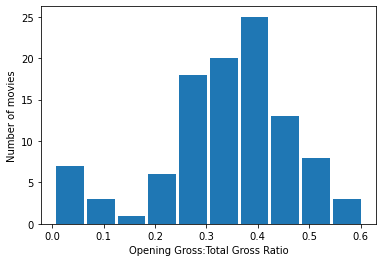

In [33]:
# insert 10
plt.hist(movies['ratio'],rwidth=0.9, bins=10)
plt.xlabel('Opening Gross:Total Gross Ratio')
plt.ylabel("Number of movies")

11.Update the open date column to include the year 2017. For example, the string 06/22 should become the string 06/22/2017. You can do this in one line.

In [34]:
# insert 11
movies['open date'] = movies['open date']+' 2017'
movies.head()

TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'

12.Use the built-in pandas datetime capability to convert the opening date column to a datetime object in one line.

In [15]:
# insert 12
movies['open date'] = pd.to_datetime(movies['open date'])
print(movies.dtypes)
movies.head()

movie                    object
total gross              object
opening gross            object
open date        datetime64[ns]
dtype: object


,movie,total gross,opening gross,open date
0,Star Wars: Episode VIII - The Last Jedi,620181382,"$220,009,584",2017-12-15
1,Beauty and the Beast,504014165,"$174,750,616",2017-03-17
2,Wonder Woman,412563408,"$103,251,471",2017-06-02
3,Jumanji: Welcome to the Jungle,404515480,"$36,169,328",2017-12-20
4,Guardians of the Galaxy Vol. 2,389813101,"$146,510,104",2017-05-05


13.Make another column called "open month" that just includes the opening month of the opening date. Use pandas datetime to do this in one line. Hint - google the following search term:

python pandas extract year from datetime


In [16]:
# insert 13
movies['open month'] = [m.month for m in movies['open date']]
movies.head()

,movie,total gross,opening gross,open date,open month
0,Star Wars: Episode VIII - The Last Jedi,620181382,"$220,009,584",2017-12-15,12
1,Beauty and the Beast,504014165,"$174,750,616",2017-03-17,3
2,Wonder Woman,412563408,"$103,251,471",2017-06-02,6
3,Jumanji: Welcome to the Jungle,404515480,"$36,169,328",2017-12-20,12
4,Guardians of the Galaxy Vol. 2,389813101,"$146,510,104",2017-05-05,5


14.Create a frequency table (not a graph) to find the most popular month for blockbuster hits.

In [35]:
# insert 14
table = movies['open month'].value_counts(sort=True)
table

10    12
7     11
6     10
12     9
3      9
9      9
4      9
5      8
8      8
2      7
11     6
1      6
Name: open month, dtype: int64

15.Create a histogram of the months. Make the rwidth be 0.9 and the bins start at 0.5 and end at 13.5 in increments of 1.

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]


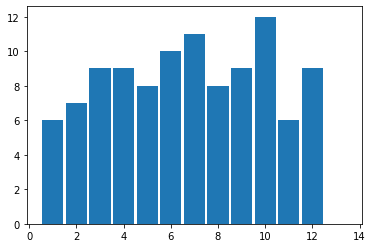

In [36]:
# insert 15
bins = [x*0.5 for x in range(1,28) if x%2!=0]
print(bins)
p = plt.hist(movies['open month'], rwidth=0.9, bins=bins)



16.Okay. Now we're going to add more info to our dataframe that wasn't included on the website up above. Create a new column for budget in your dataframe called "budget".

In [17]:
# insert 16
movies['budget'] = None
movies.head()

,movie,total gross,opening gross,open date,open month,budget
0,Star Wars: Episode VIII - The Last Jedi,620181382,"$220,009,584",2017-12-15,12,None
1,Beauty and the Beast,504014165,"$174,750,616",2017-03-17,3,None
2,Wonder Woman,412563408,"$103,251,471",2017-06-02,6,None
3,Jumanji: Welcome to the Jungle,404515480,"$36,169,328",2017-12-20,12,None
4,Guardians of the Galaxy Vol. 2,389813101,"$146,510,104",2017-05-05,5,None


17.Go to the website https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses . Find the XPath of the first movie name listed. Copy and paste the XPath link below:

In [378]:
# insert 17
# //*[@id="table"]/div/table[2]/tbody/tr[2]/td[2]/a

18.Use Selenium to click on the movie name link and then print the movie's budget below.

In [18]:
# insert 18
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses")
link = driver.find_element_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr[2]/td[2]/a')
link.click()
budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span')
print(budget.text)
driver.close()



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\ElcaJ\.wdm\drivers\chromedriver\win32\101.0.4951.41]
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1060378079.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1060378079.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link = driver.find_element_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr[2]/td[2]/a')
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1060378079.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  budget = driv

$317,000,000


19.Okay, so we'll want to iterate through all of the movies in the list located at https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses , click on their links, and save their budget. But we may run into a problem. Write the XPaths of the first and second movies in the list below. Is it the same as the first? If not, what is different?

In [380]:
# insert 19
#//*[@id="table"]/div/table[2]/tbody/tr[2]/td[2]/a

#//*[@id="table"]/div/table[2]/tbody/tr[3]/td[2]/a

# They're mostly the same, except for  ^ (a 3 instead of a 2), the table row number

20.To get around this, we actually won't search by the exact XPath, because that is too specific. Right click and then inspect the first movie in the list again. You should see:

href="/release/rl2708702721/?ref_=bo_yld_table_1" ...

The `ref_` will change from one movie to another but all of them start out as: 

href="/release/..."

How do we search for this part? We can use "contains" to type:

movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/release/")]')

Note: The command above is PLURAL ("find_elements" instead of find_element.") This list will contain ALL of the movies, so you will need a loop to iterate through each movie.

Second note: You'll want to save the HREF of each movie to a list called urls. Hint: look back to the get_attribute command in the Unit 11 Assignment if you forget how to do this.


In [19]:
# insert 20
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses")


movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/release/")]')
print(movie_infos)
urls = [m.get_attribute('href') for m in movie_infos]
urls



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [C:\Users\ElcaJ\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1579301409.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1579301409.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/release/")]')


[<selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="891b88cd-38bd-4edc-b532-ee4a820b7715")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="4f8d8c91-1c4c-4457-80e0-9370ec5c0993")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="f1700fde-5cfe-46cb-a7ba-de4aa0867402")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="c12a5cab-9fa0-4197-8afc-70bd2501c46e")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="6ebfaad4-3f11-46cc-873a-6b4a1bbc0a1e")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="04d7c66c-03e2-4496-8ca4-04f434d60cbf")>, <selenium.webdriver.remote.webelement.WebElement (session="05ac7ba9a69e2d3527bcb62714f17025", element="99117b41-30a6-4e44-98e1-568ed148

['https://www.boxofficemojo.com/release/rl2708702721/?ref_=bo_yld_table_1',
 'https://www.boxofficemojo.com/release/rl222594561/?ref_=bo_yld_table_2',
 'https://www.boxofficemojo.com/release/rl578455041/?ref_=bo_yld_table_3',
 'https://www.boxofficemojo.com/release/rl3095234049/?ref_=bo_yld_table_4',
 'https://www.boxofficemojo.com/release/rl2976089601/?ref_=bo_yld_table_5',
 'https://www.boxofficemojo.com/release/rl863208961/?ref_=bo_yld_table_6',
 'https://www.boxofficemojo.com/release/rl3481241089/?ref_=bo_yld_table_7',
 'https://www.boxofficemojo.com/release/rl2959312385/?ref_=bo_yld_table_8',
 'https://www.boxofficemojo.com/release/rl122652161/?ref_=bo_yld_table_9',
 'https://www.boxofficemojo.com/release/rl1129088513/?ref_=bo_yld_table_10',
 'https://www.boxofficemojo.com/release/rl3229320705/?ref_=bo_yld_table_11',
 'https://www.boxofficemojo.com/release/rl1767212545/?ref_=bo_yld_table_12',
 'https://www.boxofficemojo.com/release/rl3983050241/?ref_=bo_yld_table_13',
 'https://ww

21.If the first url found is not actually the first movie in the list. Delete this first unnecessary url from the list.  If it is correct, then state that it is correct below.

In [382]:
# insert 21
print(urls[0])
print('https://www.boxofficemojo.com/release/rl2708702721/?ref_=bo_yld_table_1')
# it is correct

https://www.boxofficemojo.com/release/rl2708702721/?ref_=bo_yld_table_1
https://www.boxofficemojo.com/release/rl2708702721/?ref_=bo_yld_table_1


22.Use Selenium to go to visit the first URL in your updated list of urls and print the "budget" that you find from it.

In [21]:
 # insert 22
driver.get(urls[0])
budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span')
print(budget.text)
#print(urls[-1])

$317,000,000


C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/2879201102.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span')


23.Iterate through all of the urls in your list, finding each budget. As you iterate through the list, immediately update your dataframe to include the budget in the budget column. 

First hint: Remember you can update the dataframe entry by typing something like:

movies['budget'][i] = budget

**Second hint: One of your urls might mess up. Insert a try/except in order to try to get the budget name, but if it fails, print the movie and the url that gave you the error.**

**Third hint: you'll notice that some of the XPaths end in "td[2]/font/a" and some end in just "td[2]/font". MAKE SURE YOUR XPATH SEARCH TERM ENDS IN SIMPLY "td[2]/font" or else you'll miss a lot of the movies.**

**Fourth hint: The boxofficemojo website will stop working after 20 hits or so because it knows that you are scraping it so it begins throttling you. To overcome this problem, put a 5 second sleep timer between each website hit and then return to your computer in 15 minutes or so.**


In [22]:
urls[1]

,movie,total gross,opening gross,open date,open month,budget
0,Star Wars: Episode VIII - The Last Jedi,620181382,"$220,009,584",2017-12-15,12,None
1,Beauty and the Beast,504014165,"$174,750,616",2017-03-17,3,None
2,Wonder Woman,412563408,"$103,251,471",2017-06-02,6,None
3,Jumanji: Welcome to the Jungle,404515480,"$36,169,328",2017-12-20,12,None
4,Guardians of the Galaxy Vol. 2,389813101,"$146,510,104",2017-05-05,5,None
...,...,...,...,...,...,...
195,Youth,1891956,"$338,604",2017-12-15,12,None
196,A Quiet Passion,1865396,"$45,825",2017-04-14,4,None
197,Toilet: A Love Story,1830715,"$678,436",2017-08-11,8,None
198,The Wall,1803064,"$897,955",2017-05-12,5,None


In [23]:
# insert 23

import time as t

for i in range(len(urls)):

    if i %10 == 0:
        print(f'------{(i/len(urls))*100}% done------')
    #print("INDEX:",movies.index[i], "I:",i)
    #print('index: ', movies.index[i-offset], 'i:', i, 'i1:',i1, 'offset:', offset)
    #print(urls[i])
    driver.get(urls[i])
    if movies.index[i] != i:
        print(movies['movie'][i])

    else:
        try:
            budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span').text
            movies['budget'][i] = budget
            print(budget)
        except:
            print(movies['movie'][i], '\n', urls[i])
            movies['budget'][i] = 'NA' # This isn't really necessary

    t.sleep(2) # saving some seconds :)
# I'm ignoring this error because I got all the information I needed to  


------0.0% done------


C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1939047573.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span').text
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1939047573.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['budget'][i] = budget


$317,000,000
$160,000,000
$149,000,000
$90,000,000
$200,000,000
$175,000,000
$35,000,000
$180,000,000
$80,000,000
Justice League 
 https://www.boxofficemojo.com/release/rl1129088513/?ref_=bo_yld_table_10


C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_10864/1939047573.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['budget'][i] = 'NA' # This isn't really necessary


------5.0% done------
$97,000,000
$250,000,000
Coco 
 https://www.boxofficemojo.com/release/rl3983050241/?ref_=bo_yld_table_13
$100,000,000
$4,500,000
$80,000,000
The Boss Baby 
 https://www.boxofficemojo.com/release/rl2789639681/?ref_=bo_yld_table_17
$84,000,000
$230,000,000
$185,000,000
------10.0% done------
Cars 3 
 https://www.boxofficemojo.com/release/rl2054981121/?ref_=bo_yld_table_21
$150,000,000
$9,000,000
Wonder 
 https://www.boxofficemojo.com/release/rl1719567873/?ref_=bo_yld_table_24
$217,000,000
$19,000,000
$55,000,000
$34,000,000
$45,000,000
$69,000,000
------15.0% done------
$55,000,000
$15,000,000
$104,000,000
$150,000,000
John Wick: Chapter 2 
 https://www.boxofficemojo.com/release/rl1702856193/?ref_=bo_yld_table_35
$50,000,000
$100,000,000
$111,000,000
$50,000,000
$125,000,000
------20.0% done------
$30,000,000
$97,000,000
$38,000,000
$28,000,000
$22,000,000
The Shape of Water 
 https://www.boxofficemojo.com/release/rl3540026881/?ref_=bo_yld_table_46
The Lego Ninjago 

,movie,total gross,opening gross,open date,open month,budget
160,Phoenix Forgotten,3600146,"$1,816,499",2017-04-21,4,"$2,800,000"
161,An Inconvenient Sequel: Truth to Power,3496795,"$124,823",2017-07-28,7,"$1,000,000"
162,Til Death Do Us Part,3455267,"$1,527,289",2017-09-29,9,NA
163,Raees,3262954,"$1,798,379",2017-01-25,1,NA
164,The Leisure Seeker,3226443,-,2017-12-15,12,NA
165,Close Encounters of the Third Kind2017 Re-release,3100479,"$1,767,758",2017-09-01,9,"$20,000,000"
166,Colossal,3029287,"$120,226",2017-04-07,4,NA
167,Ingrid Goes West,3024308,"$135,301",2017-08-11,8,NA
168,Leap!,2844490,"$181,091",2017-02-24,2,NA
169,The Oscar Nominated Short Films 2017: Live Action,2835355,"$692,399",2017-02-10,2,NA


In [404]:
# One of the previous exercises asks for some of the rows with missing information to be removed, which then messes up the indices.
# the list of urls then does not match up. I spent a lot of time trying to write code to take this into account, 
# including several other strategies than the one below, but was unsuccessful.
# I finally decided to just run #23 before all the exercises that depended on those rows being removed (#5-#10)

# # insert 23
# import time as t

# # the indices got messed up after dropping rows that were missing values
# #movies = movies.reset_index()
# #movies = movies.rename(columns={'index':'old index'})


# offset = 0
# for i1 in range(len(urls)):
    
#     i = i1 + offset
#     if i %10 == 0:
#         print(f'------{(i/len(urls))*100}% done------')
#     #print("INDEX:",movies.index[i], "I:",i)
#     #print('index: ', movies.index[i-offset], 'i:', i, 'i1:',i1, 'offset:', offset)
#     #print(urls[i])
#     driver.get(urls[i-offset])
#     if movies.index[i-offset] != i:
#         offset += 1
#         #i = i1 + offset
#     else:
#         try:
#             budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span').text
#             movies['budget'][i-offset] = budget
#             print(budget)
#         except:
#             print(movies['movie'][i1], '\n', urls[i-offset])
#             movies['budget'][i-offset] = 'NA' # This isn't really necessary

#     t.sleep(2) # saving some seconds :)
# # I'm ignoring this error because I got all the information I needed to  
# movies[160:170]

------0.0% done------


C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_8988/2316121129.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  budget = driver.find_element_by_xpath('//*[@id="a-page"]/main/div/div[3]/div[4]/div[3]/span[2]/span').text
C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_8988/2316121129.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['budget'][i-offset] = budget


$317,000,000
$160,000,000
$149,000,000
$90,000,000
$200,000,000
$175,000,000
$35,000,000
$180,000,000
$80,000,000
Justice League 
 https://www.boxofficemojo.com/release/rl1129088513/?ref_=bo_yld_table_10


C:\Users\ElcaJ\AppData\Local\Temp/ipykernel_8988/2316121129.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['budget'][i-offset] = 'NA' # This isn't really necessary


------5.0% done------
$97,000,000
$250,000,000
Coco 
 https://www.boxofficemojo.com/release/rl3983050241/?ref_=bo_yld_table_13
$100,000,000
$4,500,000
$80,000,000
The Boss Baby 
 https://www.boxofficemojo.com/release/rl2789639681/?ref_=bo_yld_table_17
$84,000,000
$230,000,000
$185,000,000
------10.0% done------
Cars 3 
 https://www.boxofficemojo.com/release/rl2054981121/?ref_=bo_yld_table_21
$150,000,000
$9,000,000
Wonder 
 https://www.boxofficemojo.com/release/rl1719567873/?ref_=bo_yld_table_24
$217,000,000
$19,000,000
$55,000,000
$34,000,000
$45,000,000
$69,000,000
------15.0% done------
$55,000,000
$15,000,000
$104,000,000
$150,000,000
John Wick: Chapter 2 
 https://www.boxofficemojo.com/release/rl1702856193/?ref_=bo_yld_table_35
$50,000,000
$100,000,000
$111,000,000
$50,000,000
$125,000,000
------20.0% done------
$30,000,000
$97,000,000
$38,000,000
$28,000,000
$22,000,000
The Shape of Water 
 https://www.boxofficemojo.com/release/rl3540026881/?ref_=bo_yld_table_46
The Lego Ninjago 

KeyError: 177

24. Change the budget column to be of type "integer"

In [38]:
#print(urls[163])
#print(movies[160:170])
#print()
#print(movies.index[163])
#print(movies.index[164])
#print(type(movies.index[165]))
#print(movies.reset_index)
# movies1 = movies.reset_index()
# print(movies1.columns)
# movies2 = movies1.rename(columns={'index':'old index'})
# print(movies2.columns)
#movies = movies.drop(['old index'], axis=1)



# THIS IS NUMBER 26
movies = movies[movies['budget'] != 'NA']

# for m in movies['budget']:
#     print(m)

# AND NOW NUMBER 24
movies['budget'] = [gross.strip('$') for gross in movies['budget']]
movies['budget'] = [x.replace(',', '') for x in movies['budget']]

movies['budget'] = movies['budget'].astype(int)
print(movies.dtypes)
movies.tail()

movie                    object
total gross               int32
opening gross             int32
open date        datetime64[ns]
open month                int64
budget                    int32
ratio                   float64
dtype: object


,movie,total gross,opening gross,open date,open month,budget,ratio
160,Phoenix Forgotten,3600146,1816499,2017-04-21,4,2800000,0.504563
161,An Inconvenient Sequel: Truth to Power,3496795,124823,2017-07-28,7,1000000,0.035696
165,Close Encounters of the Third Kind2017 Re-release,3100479,1767758,2017-09-01,9,20000000,0.570156
171,Wolf Warrior 2,2721100,219022,2017-07-28,7,30100000,0.080490
182,T2 Trainspotting,2402004,170575,2017-03-17,3,18000000,0.071014


25.You definitely won't want to run the above code again because it takes so long. Pickle your dataframe so you can work with it later. If you forget how to pickle, go to the bottom of the Unit 8 Assignment.

In [39]:
# insert 25
movies.to_pickle('movies_pickle.pkl')

25.Read the dataframe back in (and call it movies again) from the pickle file to make sure it saved correctly.

In [40]:
# insert 25
movies = pd.read_pickle('movies_pickle.pkl')

26.Drop the movies from the dataframe that didn't have a budget listed. (Note: You won't be able to use dropna since technically none of the entries are null since you may have initialized them all to be an empty string '' or zero. However, you can exclude those entries from the dataframe using an expression that involves a "!=" symbol.


In [0]:
# insert 26
#### I DID THIS BEFORE #24 so that i could change the column type to an integer

27.Re-pickle your dataframe so that your changes are saved.

In [0]:
# insert 27
# because I switched the order of the problems (I couldn't do #24 without doing #26), 
#   I don't need to do this because there are no changes to be saved
movies.to_pickle('movies_pickle2.pkl')

28. Come up with your own exploratory data analysis question about the movies in this dataframe related to gross, budget, date, or opening gross and write that question here.

In [41]:
# insert 28
# How many movies were successful (had a total gross higher than the budget) in 2017?
# Is there a correlation between the budget and success of a movie?

,movie,total gross,opening gross,open date,open month,budget,ratio
0,Star Wars: Episode VIII - The Last Jedi,620181382,220009584,2017-12-15,12,317000000,0.354750
1,Beauty and the Beast,504014165,174750616,2017-03-17,3,160000000,0.346718
2,Wonder Woman,412563408,103251471,2017-06-02,6,149000000,0.250268
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,12,90000000,0.089414
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,5,200000000,0.375847
...,...,...,...,...,...,...,...
160,Phoenix Forgotten,3600146,1816499,2017-04-21,4,2800000,0.504563
161,An Inconvenient Sequel: Truth to Power,3496795,124823,2017-07-28,7,1000000,0.035696
165,Close Encounters of the Third Kind2017 Re-release,3100479,1767758,2017-09-01,9,20000000,0.570156
171,Wolf Warrior 2,2721100,219022,2017-07-28,7,30100000,0.080490


29. Answer the question you posed in 28 below. You may use graphs, histograms, value counts, or any other appropriate data analysis techniques to answer your question below.

In [86]:
# insert 29
gain = []
even = []
loss = []

for m in movies.index:
    totalGross = movies['total gross'][m]
    budget = movies['budget'][m]
    movie = movies['movie'][m]
    

    if  totalGross > budget:
        gain.append(budget)
    elif totalGross == budget:
        even.append(budget)
    else:
        loss.append(budget)

print(f'{len(gain)} movies were successful.')
if len(even) != 0:
    print(f'{len(even)} movies broke even.')
print(f'{len(loss)} movies were unsuccessful.')

# the sum function doesn't work on gain, maybe because it's too large of a number? It says its -1578417296...
bsum = 0
for b in gain:
    bsum += b/1000
gAvg = int(str(len(gain)/bsum)[0]+'00000000')

lsum = 0
for l in loss:
    lsum += l/1000

lAvg = int(str(len(loss)/lsum)[0]+'00000000')
print('----------')
print(f'The average budget of a successful movie was ${str(len(gain)/bsum)[0]}00,000,000.') # I cheated a little and manually found that it needed 8 zeros. :)
print(f'The average budget of an un successful movie was ${str(len(loss)/lsum)[0]}00,000,000.')
print('----------')
if gAvg == lAvg:
    print("Thus, the budget of a movie had no effect on if the movie would 'make it' or 'break it' in 2017.")
elif gAvg > lAvg:
    print("Funnily enough, movies with a higher budget had a higher chance of success in 2017.")
else:
    print("Surprisingly, movies with a lower budget had a higher chance of success in 2017.")

55 movies were successful.
49 movies were unsuccessful.
----------
The average budget of a successful movie was $200,000,000.
The average budget of an un successful movie was $100,000,000.
----------
Funnily enough, movies with a higher budget had a higher chance of success in 2017.
